# Análise Exploratória dos Dados

Esta seção é dedicada à analise dos dados e algumas manipulações das tabelas.

## Dataset

O arquivo contém os diferentes atributos dos detalhes das reservas dos clientes. O dicionário de dados detalhado é fornecido abaixo.

**Dicionário de Dados**

- Booking_ID: Identificador único de cada reserva
- no_of_adults: Número de adultos
- no_of_children: Número de crianças
- no_of_weekend_nights: Número de noites de fim de semana (sábado ou domingo) que o hóspede ficou ou reservou para ficar no hotel
- no_of_week_nights: Número de noites de semana (segunda a sexta-feira) que o hóspede ficou ou reservou para ficar no hotel
- type_of_meal_plan: Tipo de plano de refeição reservado pelo cliente
- required_car_parking_space: O cliente necessita de espaço para estacionamento? (0 - Não, 1 - Sim)
- room_type_reserved: Tipo de quarto reservado pelo cliente. Os valores são cifrados (codificados) pelos Hotéis INN.
- lead_time: Número de dias entre a data da reserva e a data de chegada
- arrival_year: Ano da data de chegada
- arrival_month: Mês da data de chegada
- arrival_date: Dia do mês da data de chegada
- market_segment_type: Designação do segmento de mercado
- repeated_guest: O cliente é um hóspede recorrente? (0 - Não, 1 - Sim)
- no_of_previous_cancellations: Número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual
- no_of_previous_bookings_not_canceled: Número de reservas anteriores não canceladas pelo cliente antes da reserva atual
- avg_price_per_room: Preço médio por dia da reserva; os preços dos quartos são dinâmicos. (em euros)
- no_of_special_requests: Número total de pedidos especiais feitos pelo cliente (por exemplo, andar alto, vista do quarto, etc.)
- booking_status: Indicador que mostra se a reserva foi cancelada ou não.

Precisamos adicionar os custom modules, os scripts, ao env path, para podermos importá-los.

In [1]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

Nosso dataset tem 36275 linhas e 19 colunas. Esses 36 mil linhas representam cada dado coletado e as colunas os features de cada entrada.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

csv_path = '../data/HotelReservationsLabel.csv'
df = pd.read_csv(csv_path)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,label_avg_price_per_room
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,Not_Canceled,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,Not_Canceled,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,Canceled,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,Not_Canceled,3
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,Canceled,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,Not_Canceled,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,Canceled,2


Podemos checar o começo e o fim do dataframe.

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,label_avg_price_per_room
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,Not_Canceled,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,Not_Canceled,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,Canceled,2


In [4]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,label_avg_price_per_room
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,Not_Canceled,3
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,Canceled,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,Not_Canceled,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,Canceled,2
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,0,Not_Canceled,3


O formato e as informações.

In [5]:
df.shape

(36275, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64 
 2   no_of_children                        36275 non-null  int64 
 3   no_of_weekend_nights                  36275 non-null  int64 
 4   no_of_week_nights                     36275 non-null  int64 
 5   type_of_meal_plan                     36275 non-null  object
 6   required_car_parking_space            36275 non-null  int64 
 7   room_type_reserved                    36275 non-null  object
 8   lead_time                             36275 non-null  int64 
 9   arrival_year                          36275 non-null  int64 
 10  arrival_month                         36275 non-null  int64 
 11  arrival_date                

Podemos ver as colunas.

In [7]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'booking_status', 'label_avg_price_per_room'],
      dtype='object')

Podemos ver quantos valores diferentes existem em cada coluna.

In [8]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
no_of_special_requests                      6
booking_status                              2
label_avg_price_per_room                    3
dtype: int64

Podemos descrever o nosso dataframe.

In [9]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,label_avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,0.619655,2.021309
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,0.786236,0.790348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,5.000000,3.000000


In [10]:
df.describe(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


Podemos ver checar a divisão dos valores categóricos

In [11]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
--------------------------------------------------
type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------------------------------
room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
--------------------------------------------------
market_segment_type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
--------------------------------------------------
booking_status
['Not_Canceled' 'Canceled']
--------------------------------------------------


Como nosso target não está na primeira coluna, vamos fazer uma breve alteração para mostrarmos as correlações entre os valores númericos.

In [12]:
custom_columns = []
custom_columns.append('label_avg_price_per_room')
for i in range(len(df.columns[:-1])):
    if df.columns[i] != 'label_avg_price_per_room':
        custom_columns.append(df.columns[i])

df_price = df[custom_columns]
df_price.head()

,label_avg_price_per_room,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,Not_Canceled
1,2,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,Not_Canceled
2,1,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,Canceled
3,2,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,Canceled
4,2,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,Canceled


In [13]:
corr = df_price.corr(numeric_only=True)
corr

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
label_avg_price_per_room,1.000000,0.260361,0.195747,-0.032719,-0.005931,0.050132,-0.020239,0.181640,0.065180,0.006782,-0.157091,-0.065158,-0.101641,0.193118
no_of_adults,0.260361,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.189401
no_of_children,0.195747,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.124486
no_of_weekend_nights,-0.032719,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,0.060593
no_of_week_nights,-0.005931,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.045994
required_car_parking_space,0.050132,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.087922
lead_time,-0.020239,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.101645
arrival_year,0.181640,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.053205
arrival_month,0.065180,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.110552
arrival_date,0.006782,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.018352


E podemos plotar essa correlação em um heatmap.

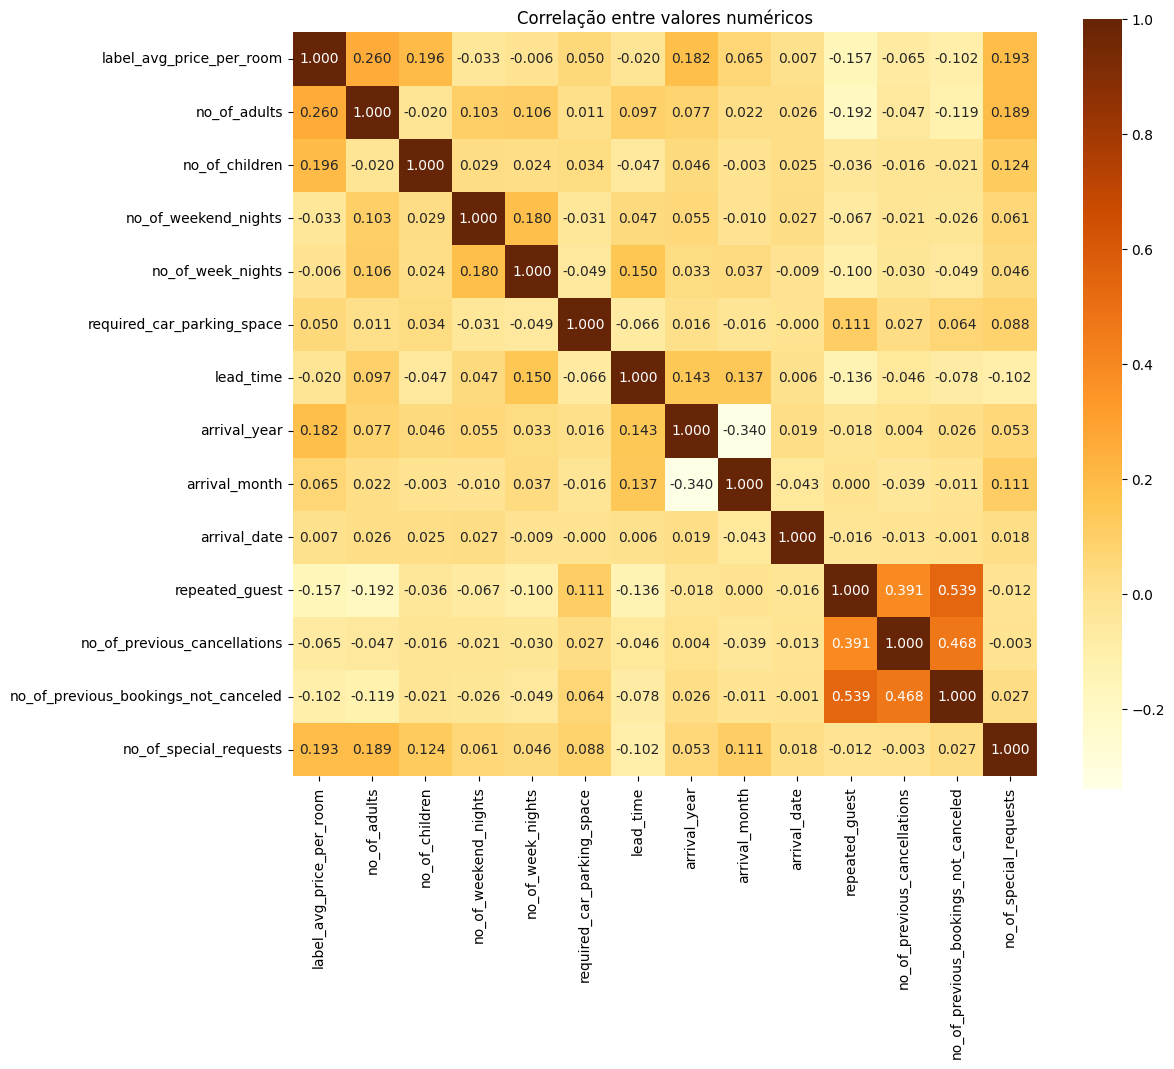

In [14]:
plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap='YlOrBr', annot=True, square=True, fmt='.3f')
plt.title('Correlação entre valores numéricos')
plt.show()

Vamos ver como esses valores estão distribuídos em algumas colunas.

In [16]:
df['label_avg_price_per_room'].value_counts()

label_avg_price_per_room
2    13600
3    11724
1    10951
Name: count, dtype: int64

In [17]:
df['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [18]:
df['no_of_children'].value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [19]:
df['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

In [20]:
df['arrival_month'].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

In [21]:
df['no_of_week_nights'].value_counts()

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [22]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Podemos ver que alguns valores estão bem distribuídos e que alguns dos valores não.

Vamos plotar alguns deles.

<Axes: xlabel='no_of_week_nights', ylabel='count'>

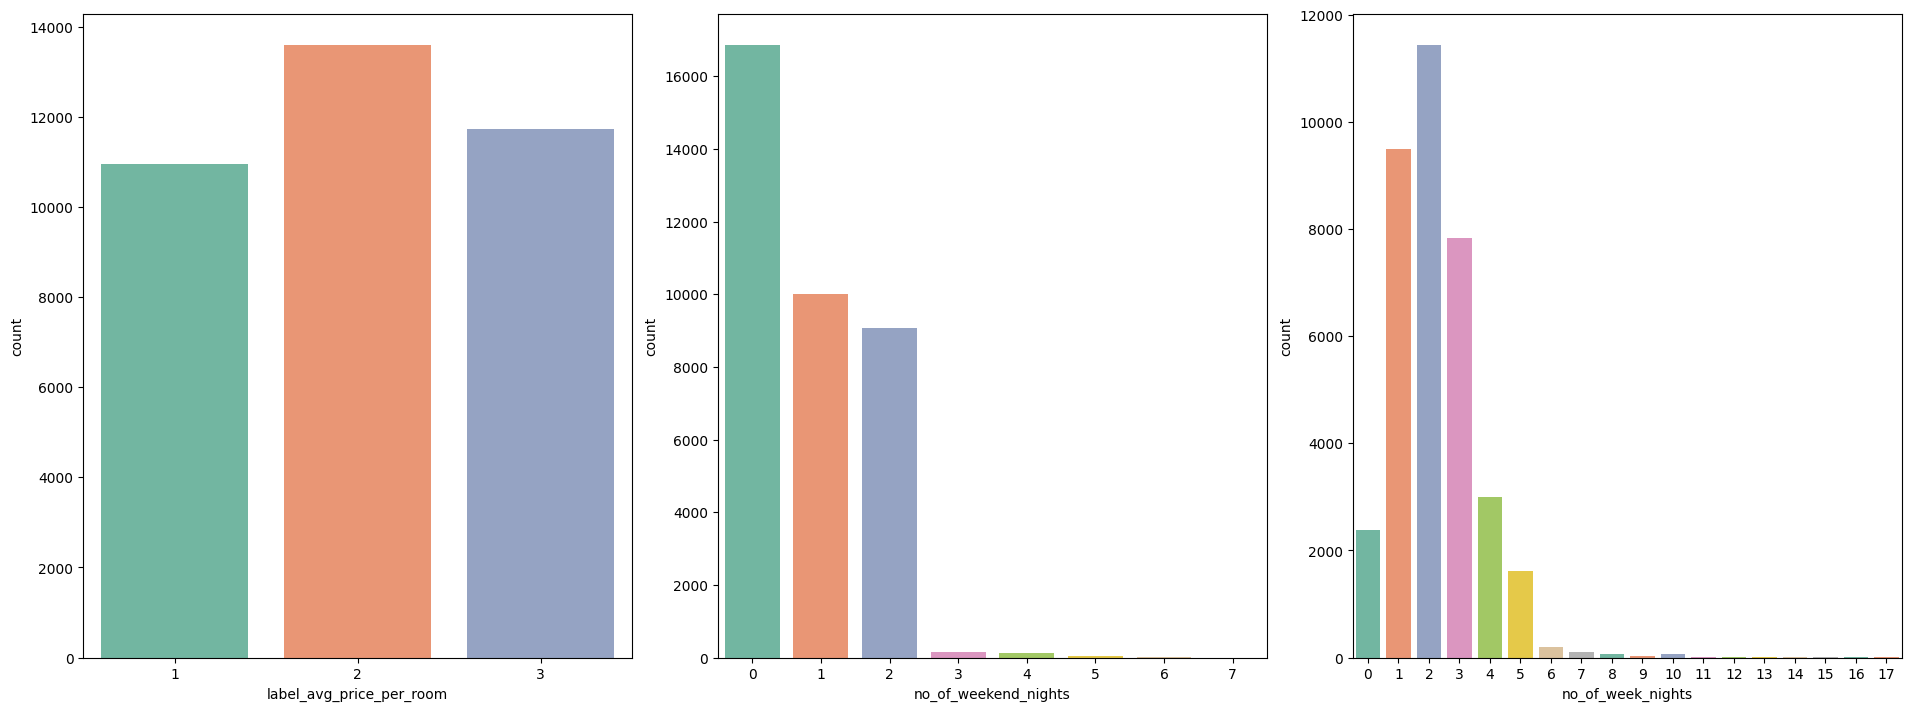

In [24]:
f,ax=plt.subplots(1,3,figsize=(19,7),constrained_layout = True)
sns.countplot(x=df["label_avg_price_per_room"], ax=ax[0], palette='Set2')
sns.countplot(x=df["no_of_weekend_nights"], ax=ax[1], palette='Set2')
sns.countplot(x=df["no_of_week_nights"], ax=ax[2], palette='Set2')

<Axes: xlabel='arrival_date', ylabel='count'>

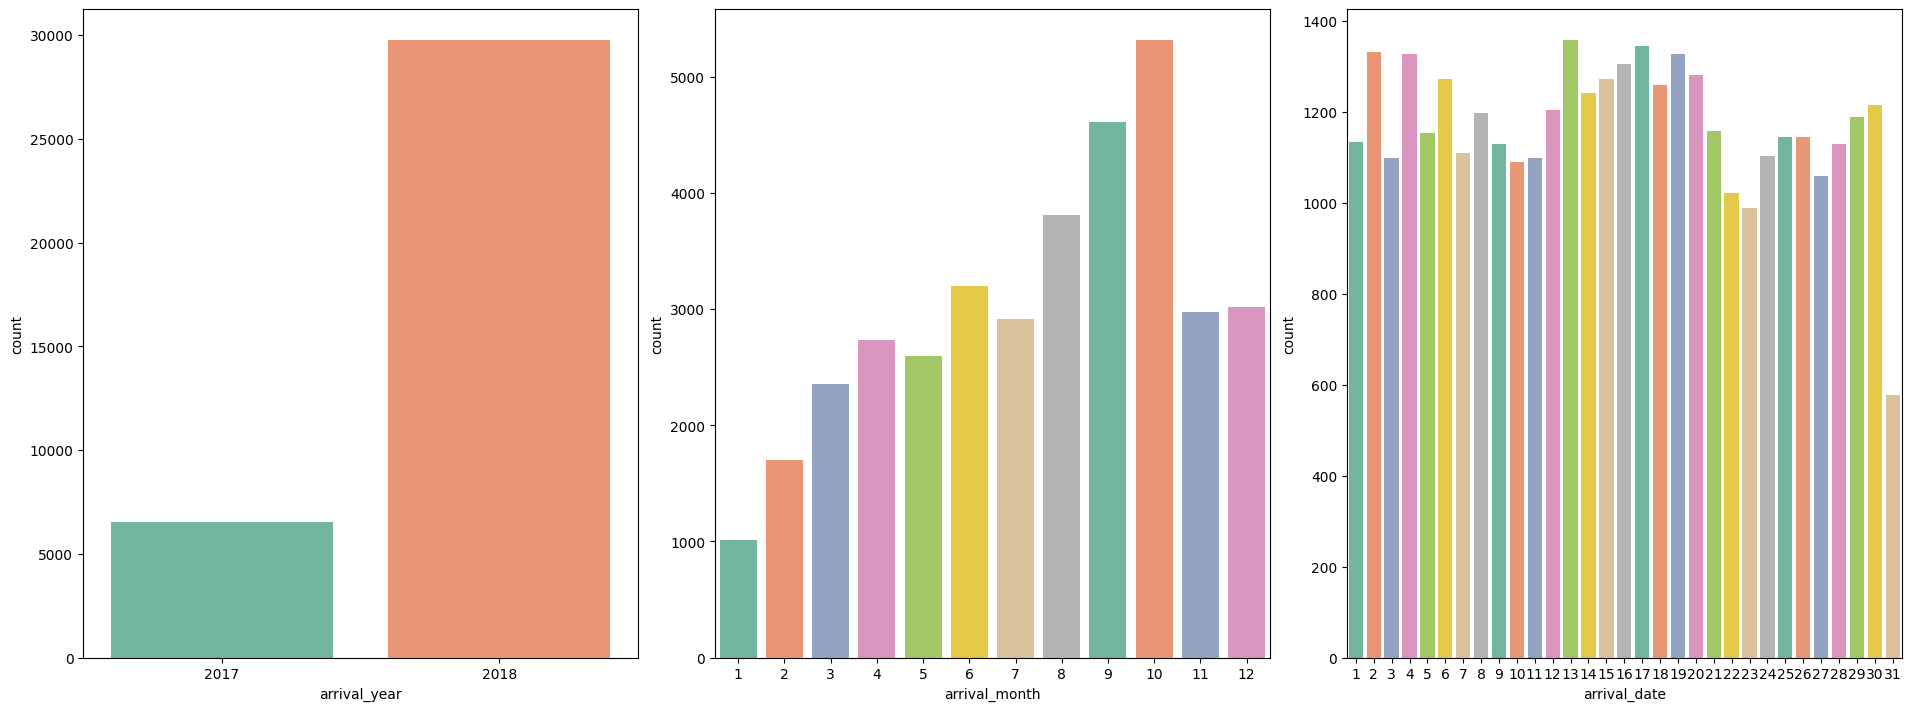

In [25]:
f,ax=plt.subplots(1,3,figsize=(19,7),constrained_layout = True)
sns.countplot(x=df["arrival_year"], ax=ax[0], palette='Set2')
sns.countplot(x=df["arrival_month"], ax=ax[1], palette='Set2')
sns.countplot(x=df["arrival_date"], ax=ax[2], palette='Set2')

<Axes: xlabel='room_type_reserved', ylabel='count'>

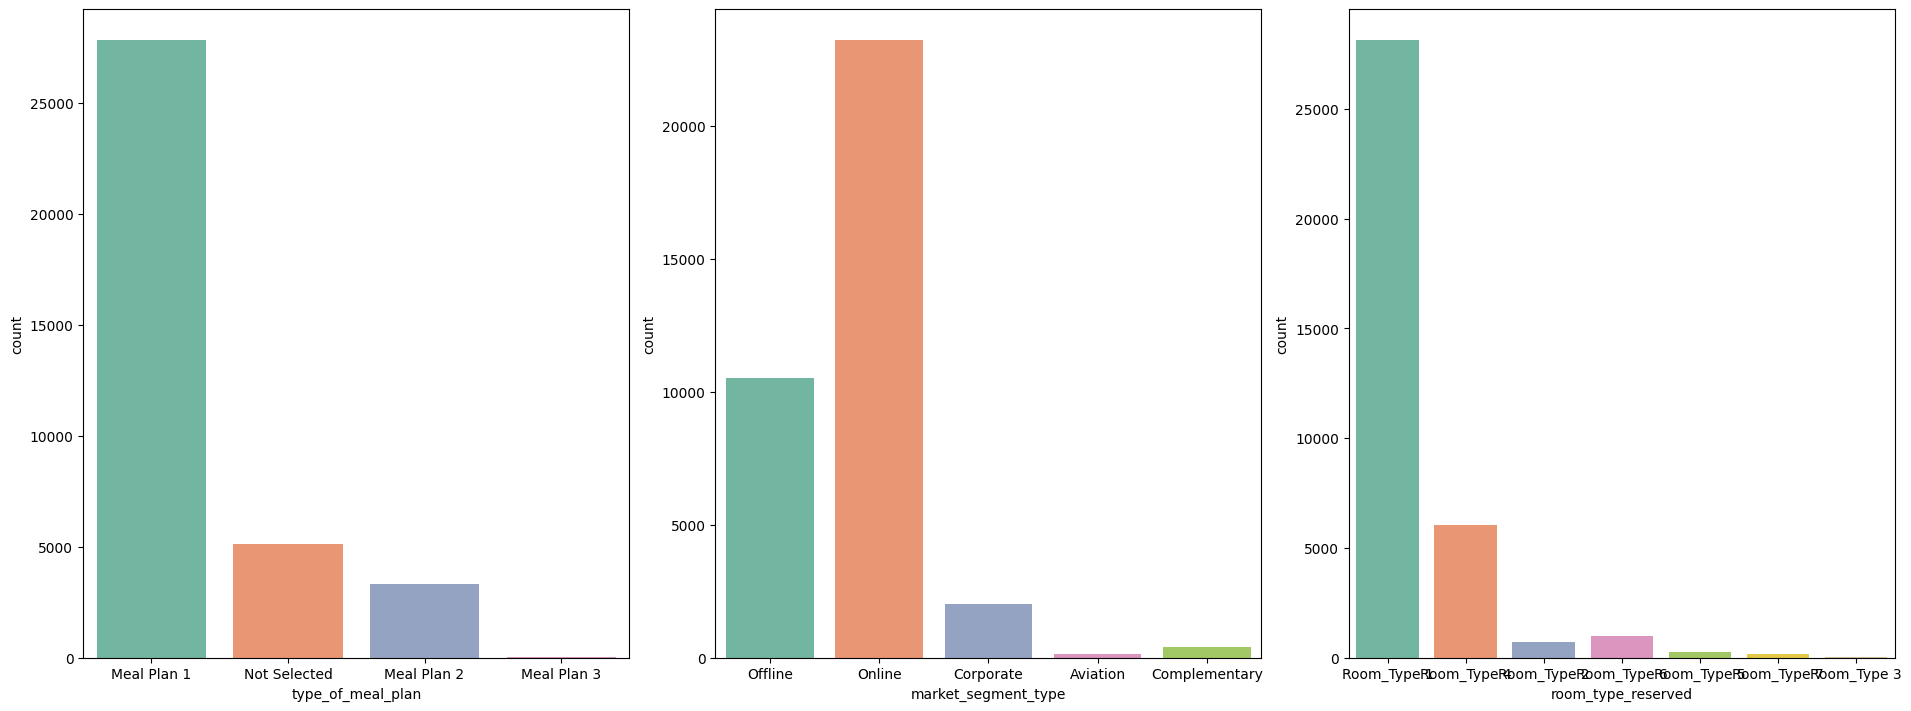

In [26]:
f,ax=plt.subplots(1,3,figsize=(19,7),constrained_layout = True)
sns.countplot(x=df["type_of_meal_plan"], ax=ax[0], palette='Set2')
sns.countplot(x=df["market_segment_type"], ax=ax[1], palette='Set2')
sns.countplot(x=df["room_type_reserved"], ax=ax[2], palette='Set2')

Continuaremos plotando alguns gráficos para ver como o é o dataset e como alguns dos valores categóricos e numéricos se comportam.

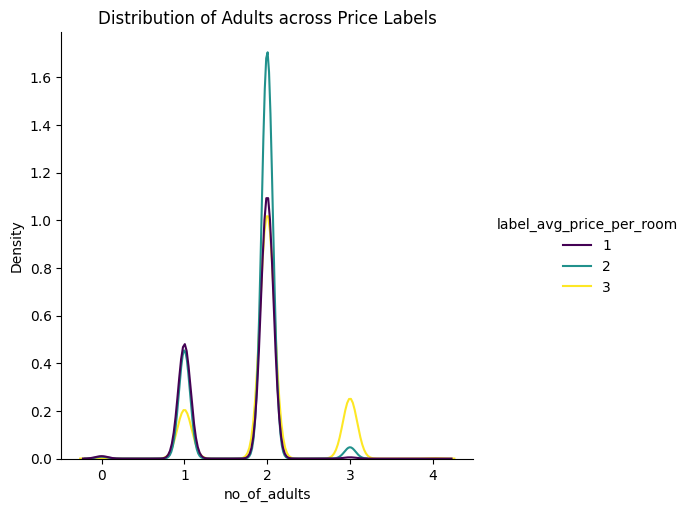

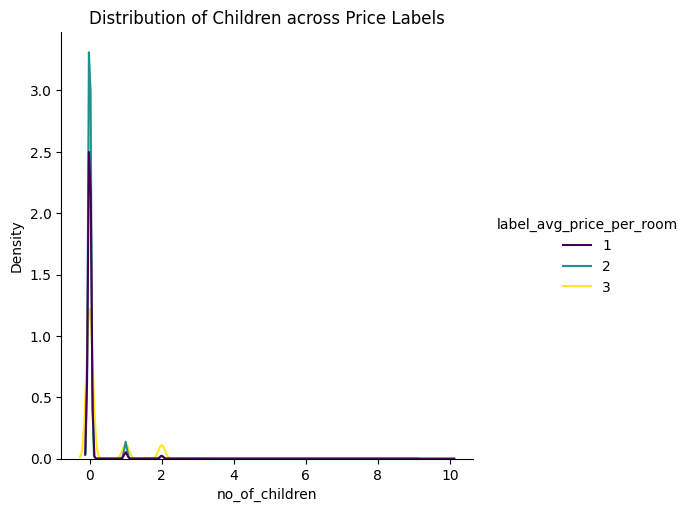

In [28]:
sns.displot(x="no_of_adults", hue="label_avg_price_per_room", data=df, kind="kde", palette='viridis')
plt.title("Distribution of Adults across Price Labels")
plt.show()

sns.displot(x="no_of_children", hue="label_avg_price_per_room", data=df, kind="kde", palette='viridis')
plt.title("Distribution of Children across Price Labels")
plt.show()

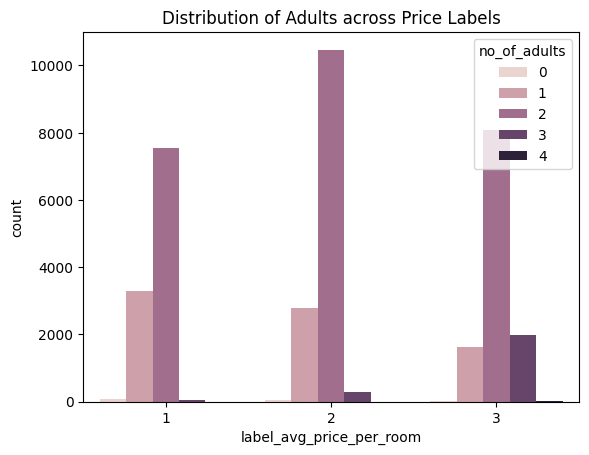

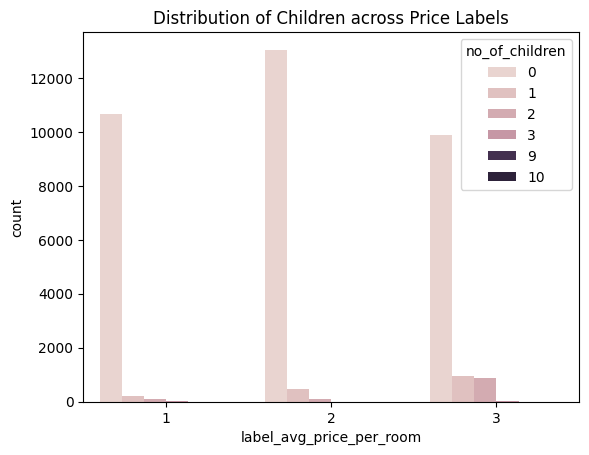

In [29]:
sns.countplot(x="label_avg_price_per_room", hue="no_of_adults", data=df)
plt.title("Distribution of Adults across Price Labels")
plt.show()

sns.countplot(x="label_avg_price_per_room", hue="no_of_children", data=df)
plt.title("Distribution of Children across Price Labels")
plt.show()

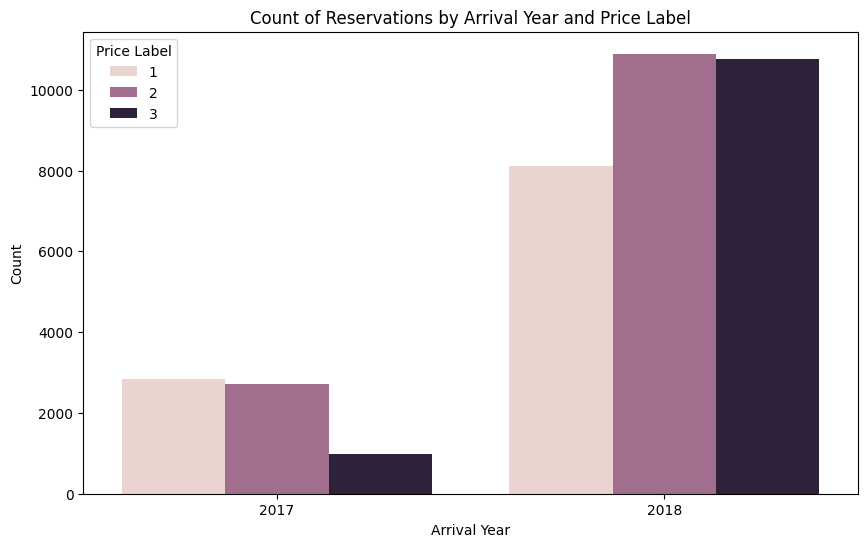

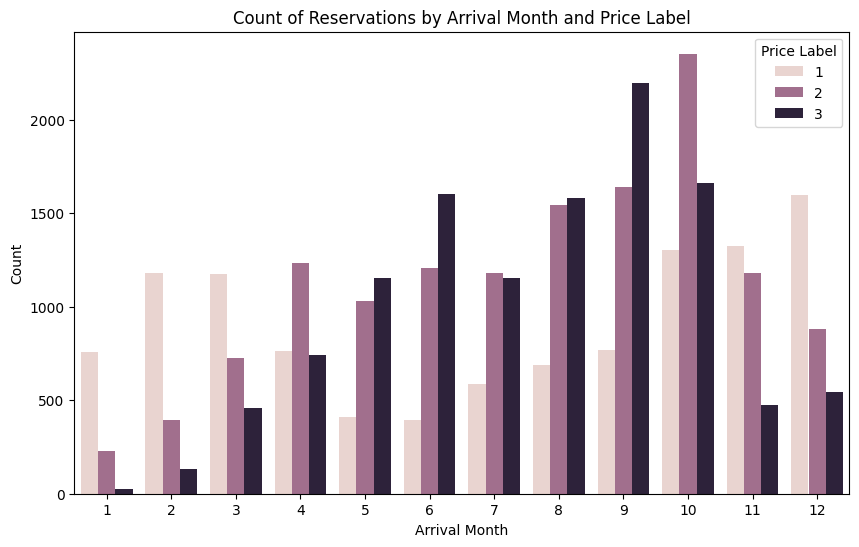

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_year', hue='label_avg_price_per_room', data=df)
plt.title('Count of Reservations by Arrival Year and Price Label')
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_month', hue='label_avg_price_per_room', data=df)
plt.title('Count of Reservations by Arrival Month and Price Label')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

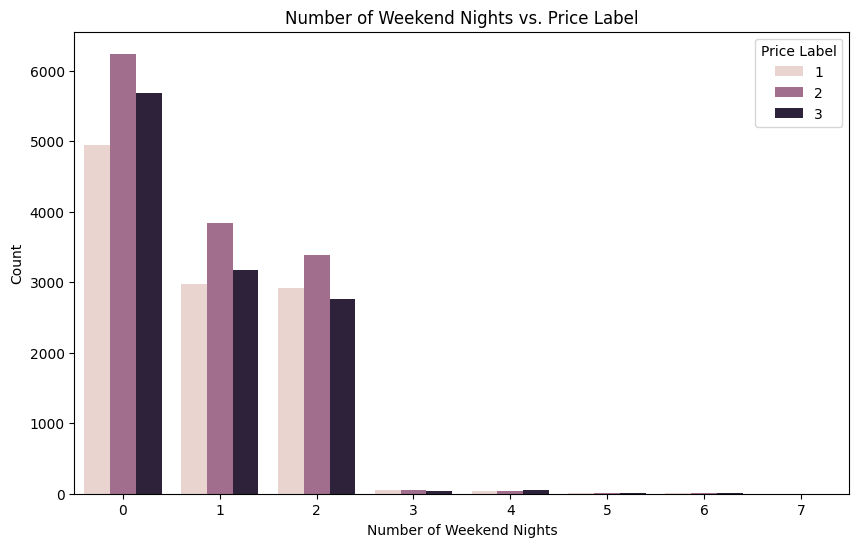

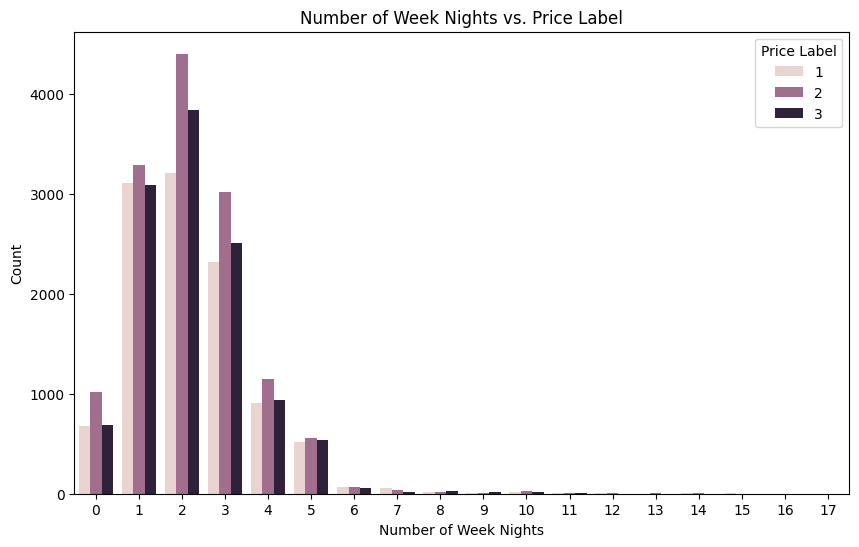

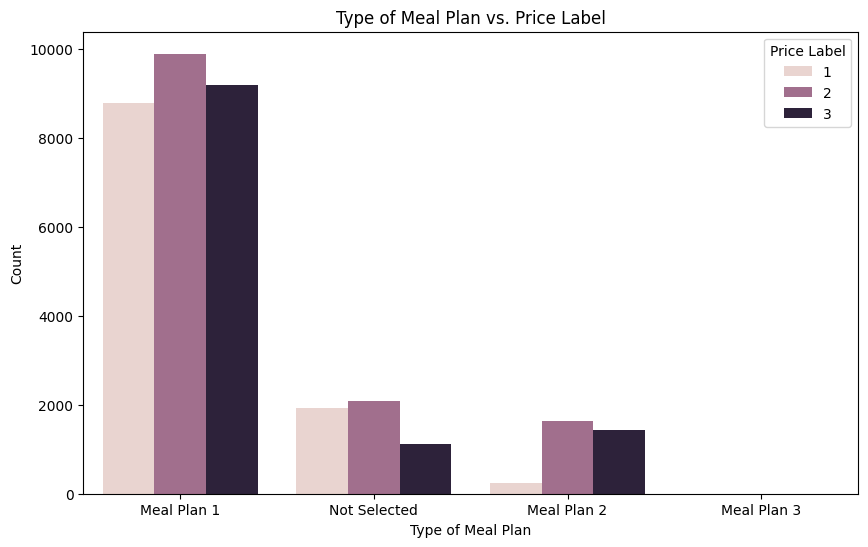

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_weekend_nights', hue='label_avg_price_per_room')
plt.title('Number of Weekend Nights vs. Price Label')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_week_nights', hue='label_avg_price_per_room')
plt.title('Number of Week Nights vs. Price Label')
plt.xlabel('Number of Week Nights')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type_of_meal_plan', hue='label_avg_price_per_room')
plt.title('Type of Meal Plan vs. Price Label')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

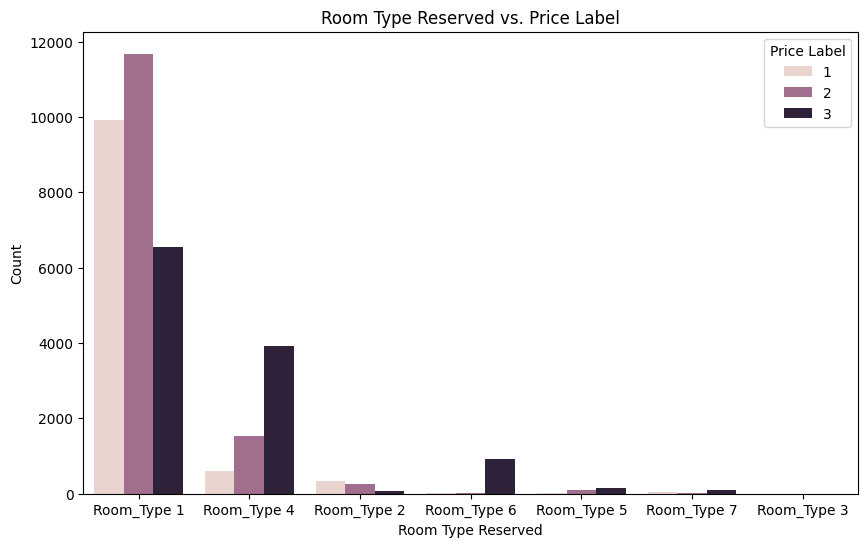

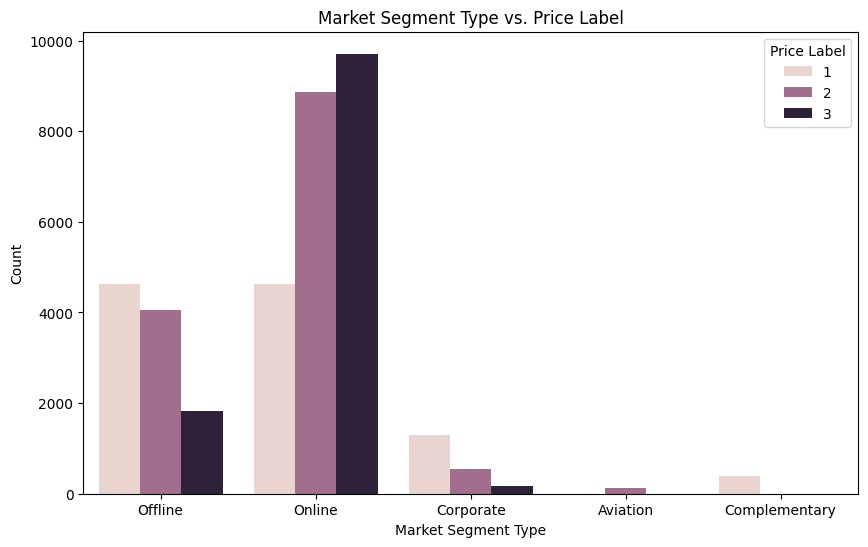

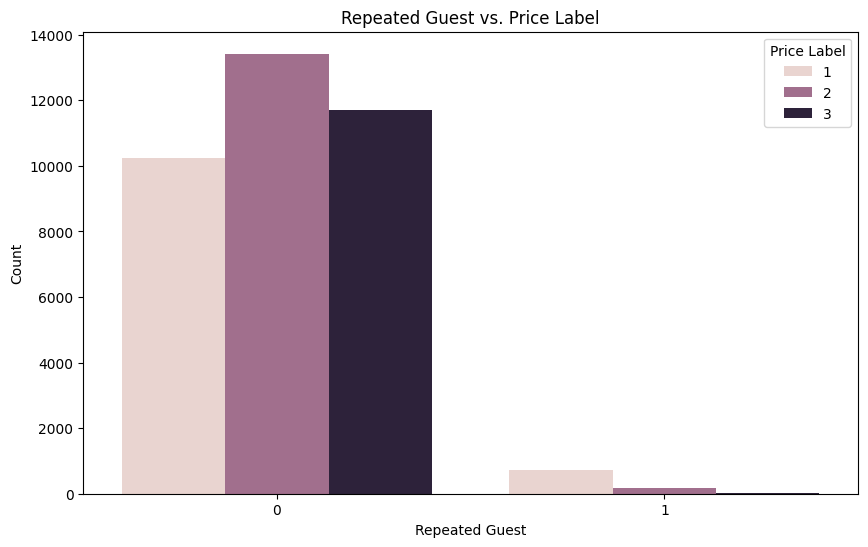

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type_reserved', hue='label_avg_price_per_room')
plt.title('Room Type Reserved vs. Price Label')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment_type', hue='label_avg_price_per_room')
plt.title('Market Segment Type vs. Price Label')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='repeated_guest', hue='label_avg_price_per_room')
plt.title('Repeated Guest vs. Price Label')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.legend(title='Price Label')
plt.show()


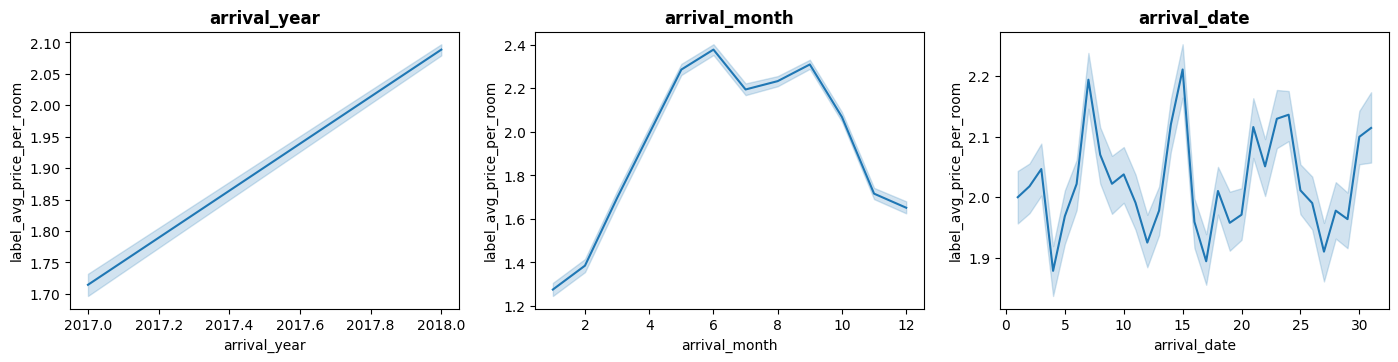

In [34]:
c = ['arrival_year','arrival_month','arrival_date']

plt.figure(figsize=(14,10))
for i, col in enumerate(c):
    ax = plt.subplot(3,3,i+1)
    sns.lineplot(x=df[col],y=df['label_avg_price_per_room'])
    plt.title(col, fontweight='bold')
plt.tight_layout()
plt.show()

## Finalizando

Podemos então salvar um novo csv adicionando as colunas que achamos que podem nos ajudar. Essa não foi uma decisão puramente advinda da eda, depois de rodar nossos modelos iniciais e testar diferentes drops e diferentes novas colunas, chegamos a este resultado final.

Começamos criando nossa função e salvando o novo script.

In [8]:
%%writefile ../scripts/df_manipulation.py
import pandas as pd

def season(x):
    if x in [9,10,11]:
        return 'Autumn'
    if x in [1,2,12]:
        return 'Winter'
    if x in [3,4,5]:
        return 'Spring'
    if x in [6,7,8]:
        return 'Summer'
    return x


def alter(df):
    df.drop(columns=['Booking_ID', 'booking_status'], axis=1, inplace=True)
    df_copy = df.copy()
    custom_columns = []
    custom_columns.append('label_avg_price_per_room')
    for i in range(len(df.columns[:-1])):
        if df.columns[i] != 'label_avg_price_per_room':
            custom_columns.append(df_copy.columns[i])

    df_copy = df_copy[custom_columns]
    df_copy['no_total_people'] = df_copy['no_of_adults'] + df_copy['no_of_children']
    df_copy['no_total_nights'] = df_copy['no_of_weekend_nights'] + df_copy['no_of_week_nights']
    df_copy['season_group']= df_copy['arrival_month'].apply(season)

    return df_copy

Overwriting ../scripts/df_manipulation.py


In [9]:
from scripts import df_manipulation

df = df_manipulation.alter(df)
df

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn
1,2,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,2,5,Autumn
2,1,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,1,3,Winter
3,2,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,2,2,Spring
4,2,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,2,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,3,8,Summer
36271,2,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,2,4,Autumn
36272,2,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,2,8,Summer
36273,2,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,2,3,Spring


In [10]:
df.to_csv('../data/processed/HotelReservationsLabelP.csv', index=False)